In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#Loading dataset
data = pd.read_csv("datasets/SBI_Life_insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [4]:
#checking shape
data.shape

(1338, 8)

In [5]:
#checking fot datatype and info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


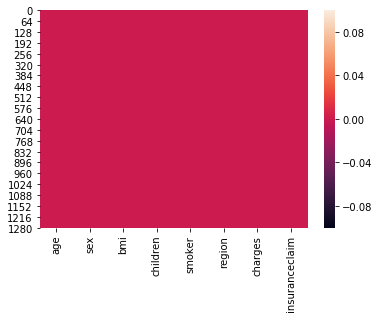

In [6]:
#checking for null value

sns.heatmap(data.isnull())

No null values are present in data

In [7]:
#describe data

data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


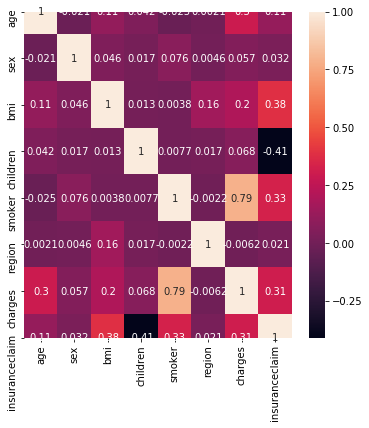

In [8]:
#Checking for correlation
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),annot=True)

In [9]:
data.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


from the above observation, 

insuranceclaim is highly negatively correlated with children

smoker and charges is highly correlated with each other

<Figure size 1800x432 with 0 Axes>

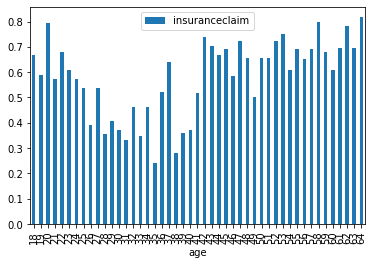

In [10]:
#Plotting age with insuranceclaim
plt.figure(figsize=(25,6))
pivot = data.pivot_table(index="age",values="insuranceclaim")
pivot.plot.bar()

plt.show()

In [11]:
#Lets check how many people has claimed insurance

notclaimed = len(data[data['insuranceclaim']==0])
claimed = len(data[data['insuranceclaim']==1])

print("Person who has claimed the insurance:", claimed)
print("Person who has not claimed the insurance:", notclaimed)

Person who has claimed the insurance: 783
Person who has not claimed the insurance: 555


#### Checking for claimed

In [12]:
#Lets check how many men and women has claimed the insurance

menclaimed = len((data[(data['insuranceclaim']==1 ) & (data['sex']==1)]))
womenclaimed = len((data[(data['insuranceclaim']==1 ) & (data['sex']==0)]))

print("Men who has claimed the insurance:", menclaimed)
print("Women who has claimed the insurance:", womenclaimed)

Men who has claimed the insurance: 406
Women who has claimed the insurance: 377


Men has claimed has max insurance

In [13]:
data.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [14]:
#checking who has claimed insruance with children

for i in data.children.unique():
    claimed = len((data[(data['insuranceclaim']==1 ) & (data['children']==i)]))
    
    print("Insurance has claimed ",claimed ,'times with ', i, "children")

Insurance has claimed  463 times with  0 children
Insurance has claimed  173 times with  1 children
Insurance has claimed  45 times with  3 children
Insurance has claimed  94 times with  2 children
Insurance has claimed  4 times with  5 children
Insurance has claimed  4 times with  4 children


Max insurance claimed for the person having 0 children

In [15]:
#Checking with region

for i in data.region.unique():
    claimed = len((data[(data['insuranceclaim']==1 ) & (data['region']==i)]))
    
    print("Insurance has claimed ",claimed ,'times for region', i)

Insurance has claimed  183 times for region 3
Insurance has claimed  245 times for region 2
Insurance has claimed  163 times for region 1
Insurance has claimed  192 times for region 0


Max insurance claimed for region 2 which is 245

In [16]:
#Checking with age
max_claimed_for = 0
max_claimed = 0
for i in data.age.unique():
    claimed = len((data[(data['insuranceclaim']==1 ) & (data['age']==i)]))
    
    if claimed > max_claimed:
        max_claimed_for = i
        max_claimed = claimed
    
    print("Insurance has claimed ",claimed ,'times for age', i)

print()
print("Insurance has max claimed for the age", max_claimed_for, 'which is ', max_claimed)

Insurance has claimed  40 times for age 19
Insurance has claimed  46 times for age 18
Insurance has claimed  10 times for age 28
Insurance has claimed  9 times for age 33
Insurance has claimed  12 times for age 32
Insurance has claimed  9 times for age 31
Insurance has claimed  17 times for age 46
Insurance has claimed  16 times for age 37
Insurance has claimed  14 times for age 60
Insurance has claimed  15 times for age 25
Insurance has claimed  18 times for age 62
Insurance has claimed  17 times for age 23
Insurance has claimed  17 times for age 56
Insurance has claimed  15 times for age 27
Insurance has claimed  21 times for age 52
Insurance has claimed  10 times for age 30
Insurance has claimed  12 times for age 34
Insurance has claimed  17 times for age 59
Insurance has claimed  16 times for age 63
Insurance has claimed  18 times for age 55
Insurance has claimed  19 times for age 22
Insurance has claimed  11 times for age 26
Insurance has claimed  6 times for age 35
Insurance has 

#### Checking for Not claimed

In [17]:
#Lets check how many men and women has claimed the insurance

menclaimed = len((data[(data['insuranceclaim']==0) & (data['sex']==1)]))
womenclaimed = len((data[(data['insuranceclaim']==0 ) & (data['sex']==0)]))

print("Men who has not claimed the insurance:", menclaimed)
print("Women who has not claimed the insurance:", womenclaimed)

Men who has not claimed the insurance: 270
Women who has not claimed the insurance: 285


In [18]:
#checking who has not claimed insruance with children

for i in data.children.unique():
    claimed = len((data[(data['insuranceclaim']==0 ) & (data['children']==i)]))
    
    print("Insurance has not claimed ",claimed ,'times with ', i, "children")

Insurance has not claimed  111 times with  0 children
Insurance has not claimed  151 times with  1 children
Insurance has not claimed  112 times with  3 children
Insurance has not claimed  146 times with  2 children
Insurance has not claimed  14 times with  5 children
Insurance has not claimed  21 times with  4 children


Person with 1 child has not claimed most

In [19]:
#Checking with region

for i in data.region.unique():
    claimed = len((data[(data['insuranceclaim']==0 ) & (data['region']==i)]))
    
    print("Insurance has not claimed ",claimed ,'times for region', i)

Insurance has not claimed  142 times for region 3
Insurance has not claimed  119 times for region 2
Insurance has not claimed  162 times for region 1
Insurance has not claimed  132 times for region 0


Insurance has not claimed for 162 time from region 1

In [20]:
#Checking with age
max_claimed_for = 0
max_claimed = 0
for i in data.age.unique():
    claimed = len((data[(data['insuranceclaim']==0 ) & (data['age']==i)]))
    
    if claimed > max_claimed:
        max_claimed_for = i
        max_claimed = claimed
    
    print("Insurance has not claimed ",claimed ,'times for age', i)

print()
print("Insurance has max not claimed for the age", max_claimed_for, 'which is ', max_claimed)

Insurance has not claimed  28 times for age 19
Insurance has not claimed  23 times for age 18
Insurance has not claimed  18 times for age 28
Insurance has not claimed  17 times for age 33
Insurance has not claimed  14 times for age 32
Insurance has not claimed  18 times for age 31
Insurance has not claimed  12 times for age 46
Insurance has not claimed  9 times for age 37
Insurance has not claimed  9 times for age 60
Insurance has not claimed  13 times for age 25
Insurance has not claimed  5 times for age 62
Insurance has not claimed  11 times for age 23
Insurance has not claimed  9 times for age 56
Insurance has not claimed  13 times for age 27
Insurance has not claimed  8 times for age 52
Insurance has not claimed  17 times for age 30
Insurance has not claimed  14 times for age 34
Insurance has not claimed  8 times for age 59
Insurance has not claimed  7 times for age 63
Insurance has not claimed  8 times for age 55
Insurance has not claimed  9 times for age 22
Insurance has not clai

age                  AxesSubplot(0.125,0.536818;0.168478x0.343182)
sex               AxesSubplot(0.327174,0.536818;0.168478x0.343182)
bmi               AxesSubplot(0.529348,0.536818;0.168478x0.343182)
children          AxesSubplot(0.731522,0.536818;0.168478x0.343182)
smoker                  AxesSubplot(0.125,0.125;0.168478x0.343182)
region               AxesSubplot(0.327174,0.125;0.168478x0.343182)
charges              AxesSubplot(0.529348,0.125;0.168478x0.343182)
insuranceclaim       AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

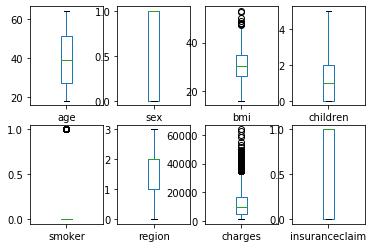

In [21]:
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(2,4))

In [22]:
#removing outliers present
from scipy.stats import zscore
z = np.abs(zscore(data))
data = data[(z<3).all(axis=1)]

age                  AxesSubplot(0.125,0.536818;0.168478x0.343182)
sex               AxesSubplot(0.327174,0.536818;0.168478x0.343182)
bmi               AxesSubplot(0.529348,0.536818;0.168478x0.343182)
children          AxesSubplot(0.731522,0.536818;0.168478x0.343182)
smoker                  AxesSubplot(0.125,0.125;0.168478x0.343182)
region               AxesSubplot(0.327174,0.125;0.168478x0.343182)
charges              AxesSubplot(0.529348,0.125;0.168478x0.343182)
insuranceclaim       AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

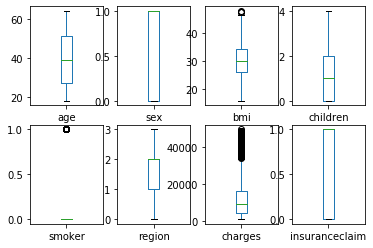

In [23]:
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(2,4))

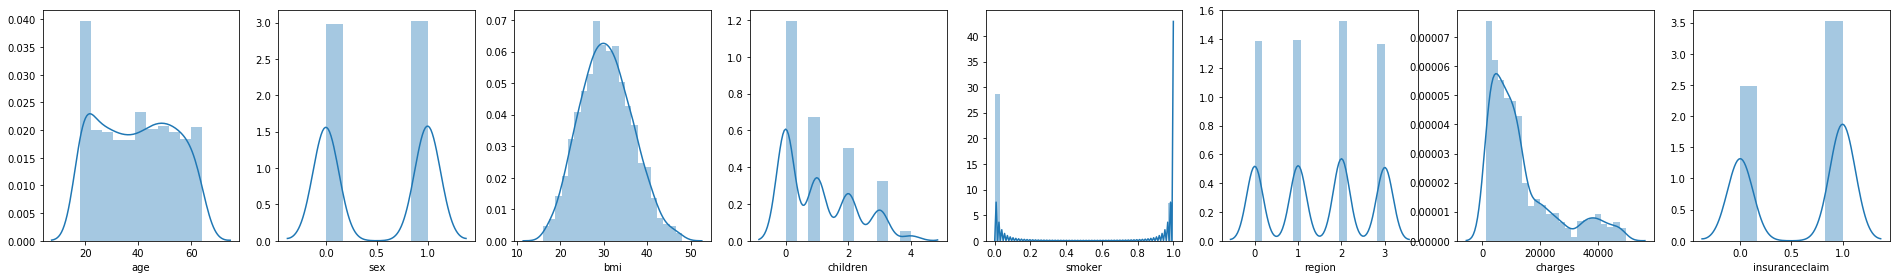

In [24]:
#checking for swekness
collist = data.columns.values
ncol = 12
nrows = 10
plt.figure(figsize=(50,50))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(data[collist[i]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029493BE9BC8>,
      dtype=object)

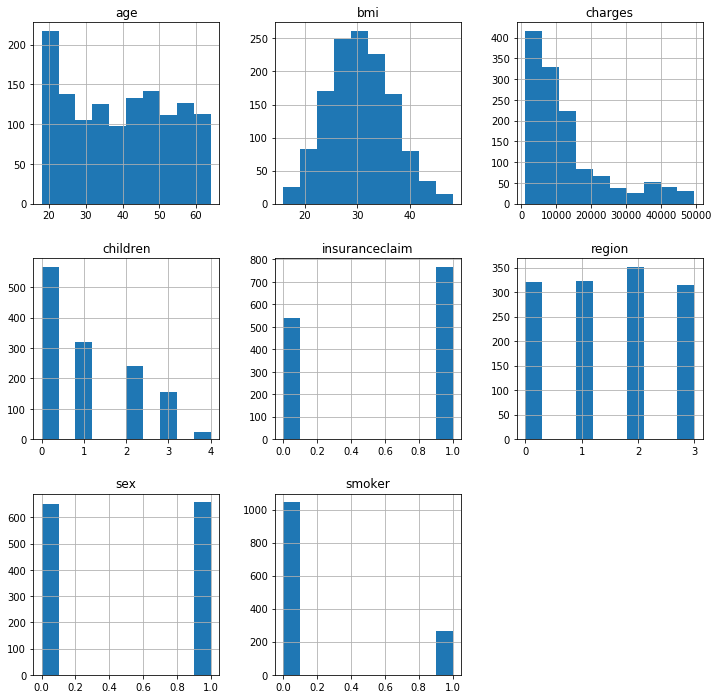

In [25]:
data.hist(figsize=(12,12))

Data is not distributed well

In [26]:
data.skew()

age               0.051340
sex              -0.010708
bmi               0.191432
children          0.738119
smoker            1.482731
region           -0.023027
charges           1.437160
insuranceclaim   -0.352569
dtype: float64

In [27]:

for col in data.columns:
    transform = np.sqrt(data[col])
    data[col] = transform

In [28]:
data.skew()

age              -0.160095
sex              -0.010708
bmi              -0.054318
children          0.080139
smoker            1.482731
region           -0.686135
charges           0.753701
insuranceclaim   -0.352569
dtype: float64

In [29]:
#Scaling the data

x = data.iloc[:,0:-1]
y = data.insuranceclaim

In [30]:
y.shape

(1309,)

In [31]:
x.shape

(1309, 7)

In [32]:
#Using standard scaler 
ss=SS()
ss.fit(x)
x=ss.transform(x)

In [33]:
x

array([[-1.5555543 , -1.00536197, -0.40794377, ...,  1.98484827,
         1.06601683,  0.54532503],
       [-1.65606066,  0.99466663,  0.56654139, ..., -0.50381685,
         0.57423597, -1.33493761],
       [-0.74930959,  0.99466663,  0.44382916, ..., -0.50381685,
         0.57423597, -0.79970332],
       ...,
       [-1.65606066, -1.00536197,  1.0439286 , ..., -0.50381685,
         0.57423597, -1.35979242],
       [-1.36218363, -1.00536197, -0.78119032, ..., -0.50381685,
         1.06601683, -1.26537961],
       [ 1.42817107, -1.00536197, -0.20607635, ...,  1.98484827,
        -0.06666532,  1.41240207]])

### TESTING MODEL WITH TRAIN AND TEST

In [34]:
def best_model(model):
    i = 0
    max_accu_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        accu_score = accuracy_score(test_y,pred_y)
        accu_score = round(accu_score*100)
        if accu_score > max_accu_score:
            max_accu_score = accu_score
            final_r_state = r_state
    print("Max Accuracy Score Corresponding to random state ", final_r_state, " is ",max_accu_score)    

#### LOGISTIC REGRESSION

In [35]:
#Logistic regression with train test split
lr = LR()
best_model(lr)

Max Accuracy Score Corresponding to random state  44  is  89.0


#### DECISION TREE CLASSIFIER

In [36]:
dtc = DTC()
best_model(dtc)

Max Accuracy Score Corresponding to random state  74  is  100.0


#### SVC

In [37]:
svclist = ['rbf','poly','linear']

for svck in svclist:
    svc = SVC(kernel=svck)
    print('Testing for SVC Kernel = ', svck)
    r_state_svm =  best_model(svc)
    print()

Testing for SVC Kernel =  rbf
Max Accuracy Score Corresponding to random state  45  is  93.0

Testing for SVC Kernel =  poly
Max Accuracy Score Corresponding to random state  49  is  91.0

Testing for SVC Kernel =  linear
Max Accuracy Score Corresponding to random state  44  is  90.0



#### GAUSSIAN NB

In [38]:
gnb = GNB()
best_model(gnb)

Max Accuracy Score Corresponding to random state  56  is  83.0


#### KNN

In [39]:
neighbors = {"n_neighbors":range(1,30)}
knn = KNN()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 3}

In [40]:
knn = KNN(n_neighbors=3)
best_model(knn)

Max Accuracy Score Corresponding to random state  66  is  93.0


#### RANDOM FOREST CLASSIFIER

In [41]:
rfc = RFC(n_estimators=50) 

param_grid = { 
    'n_estimators': [200, 700]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 700}

In [42]:
rfc=RFC(n_estimators=200)
best_model(rfc)

Max Accuracy Score Corresponding to random state  77  is  99.0


### TESTING USING CROSS VAL SCORE

In [43]:
def cross_val_function(model):
    score = cross_val_score(model,x,y,cv=5,scoring='accuracy')

    print('Cross Val Score: ', score)
    print('Mean Scores: ',score.mean())
    print('Standard deviation: ',score.std())

    print('Score :', round(score.mean()*100))

#### LOGISTIC REGRESSION

In [44]:
lr = LR()
cross_val_function(lr)

Cross Val Score:  [0.84410646 0.88931298 0.8740458  0.88122605 0.83524904]
Mean Scores:  0.8647880676579444
Standard deviation:  0.021249315121886672
Score : 86.0


#### DECISSION TREE CLASSIFIER

In [45]:
dtc = DTC()
cross_val_function(dtc)

Cross Val Score:  [0.98859316 0.94274809 0.97328244 0.98467433 0.98850575]
Mean Scores:  0.9755607533746067
Standard deviation:  0.017333984656297707
Score : 98.0


#### SVC

In [46]:
svclist = ['rbf','poly','linear']

for svck in svclist:
    svc = SVC(kernel=svck)
    print('Testing for SVC Kernel = ', svck)
    r_state_svm =  cross_val_function(svc)
    print()

Testing for SVC Kernel =  rbf
Cross Val Score:  [0.88593156 0.88549618 0.88931298 0.93869732 0.88122605]
Mean Scores:  0.8961328181776429
Standard deviation:  0.02143670777309671
Score : 90.0

Testing for SVC Kernel =  poly
Cross Val Score:  [0.87452471 0.88549618 0.8778626  0.92337165 0.85440613]
Mean Scores:  0.8831322542465259
Standard deviation:  0.022591353071909476
Score : 88.0

Testing for SVC Kernel =  linear
Cross Val Score:  [0.84790875 0.8740458  0.87022901 0.87739464 0.85440613]
Mean Scores:  0.8647968641381956
Standard deviation:  0.011549292550409972
Score : 86.0



#### GAUSSIAN NB

In [47]:
gnb = GNB()
cross_val_function(gnb)

Cross Val Score:  [0.72243346 0.79007634 0.78244275 0.82375479 0.75095785]
Mean Scores:  0.7739330375447344
Standard deviation:  0.034627427624777704
Score : 77.0


#### KNN

In [48]:
knn = KNN(n_neighbors=3)
cross_val_function(knn)

Cross Val Score:  [0.8973384  0.88549618 0.88167939 0.92337165 0.92720307]
Mean Scores:  0.9030177376409174
Standard deviation:  0.018940942603572024
Score : 90.0


#### RANDOM FOREST CLASSIFIER

In [49]:
rfc=RFC(n_estimators=200)
cross_val_function(rfc)

Cross Val Score:  [0.93155894 0.95038168 0.96564885 0.98467433 0.95402299]
Mean Scores:  0.9572573575440048
Standard deviation:  0.017551367901685818
Score : 96.0


FROM THE ABOVE ALL MODEL DECISSION TREE CLASSIFIER HAS PERFORMED WELL THAN OTHER MODEL

WE ARE USING DECISSION TREE CLASSIFIER WITH TRAIN TEST SPLIT TO SAVE OUR MODEL

In [50]:
#decision tree gave max score for random state = 74
dtc = DTC()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=74)
dtc.fit(train_x,train_y)
pred_y = dtc.predict(test_x)
accu_score = accuracy_score(test_y,pred_y)
accu_score = round(accu_score*100)
print("Accuracy score is : ", accu_score)
print("Confusion matrix is")
print()
print(confusion_matrix(test_y,pred_y))
print("Classification report ")
print()
print(classification_report(test_y,pred_y))

Accuracy score is :  100.0
Confusion matrix is

[[107   1]
 [  0 154]]
Classification report 

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       108
         1.0       0.99      1.00      1.00       154

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



#### SAVING THE MODEL

In [51]:
joblib.dump(dtc, 'Project_2_SBI Insurance_Claim_Prediction.pkl')

['Project_2_SBI Insurance_Claim_Prediction.pkl']